# Clustering and Classifying Wine Using Machine Learning, R, and GridDB

This article will cover the creation of wine clusters based on a **Wine** dataset's different attributes. **R Programming** will be used, which is very useful in creating a set of groups representing some of the differences and similarities found in the types of wines. In addition, **GridDB** will be our central database for this program as it is ideally suited to hold machine learning datasets. The article will outline the requirements to set up our database **GridDB**. Following that, we will briefly describe our dataset and model. To finish off, we will interpret the results and come up with our conclusion.

## Prerequisites

You will need:
*   GridDB
*   R version **4.2.2**
*   Jupyter Notebook found in [Anaconda](https://www.anaconda.com/)

## Requirements

The **GridDB** database storage system will store our dataset while building our clustering machine learning model. **GridDB** must be downloaded and configured in your operating system to be fully functional.

Make sure to run the following R statements to import the needed libraries helpful in running our **Wine** Cluster:

In [ ]:
install.packages( "RJDBC")
install.packages("factoextra")

In [ ]:
library(tidyverse)
library(RJDBC)
library(factoextra)

## Setup GridDB

To set up the GridDB database, we will initialize the connection object by specifying the **driverClass** and **classPath** attributes.

The following task can be as follows:

In [ ]:
drv <- JDBC("com.toshiba.mwcloud.gs.sql.Driver",
            "/usr/share/java/gridstore-jdbc-5.0.0.jar")
             #identifier.quote = "`")

The second step is to set up the **IP** address and **port** with the credentials in mind. These values will depend on your configuration and credentials. 

The task can be done as follows:

In [ ]:
conn <- dbConnect(drv, "jdbc:gs://127.0.0.1:20001/myCluster/public", "admin", "admin")

## Store Data in GridDB

In this section, we will store the data in our GridDB database. We will use the `CREATE` query to complete this task, creating a table representing your wine dataset.

The following code was used to conduct the task explained in this section:

In [ ]:
dbInsertTable <- function(conn, name, 
                          df, append = TRUE){
                          for (i in seq_len(nrow(df))) {
                            dbWriteTable(conn, name, df[i, ], append = append)
                            }
                          }

One additional step is to use the function created to add the table to our GridDB database:

In [ ]:
dbSendUpdate(conn, paste(
  "CREATE TABLE IF NOT EXISTS wine_clusters", 
  "(alcohol FLOAT, 
    acid FLOAT, 
    ash FLOAT, 
    alcanity FLOAT, 
    magnesium FLOAT, 
    phenols FLOAT,
    flavanoids FLOAT,
    nonflavanoid FLOAT,
    proanthocyanins FLOAT,
    colors FLOAT,
    hue FLOAT,
    od280 FLOAT,
    proline FLOAT,
    segment INTEGER);"))

To implement the clustering algorithm, we will use the **wine** dataset to create wine clusters. The dataset contains **14** attributes and **178** instances. The original dataset is provided by **UCI Machine Learning Repositor** in the following link:
http://archive.ics.uci.edu/ml/datasets/Wine+Quality

The last step is to populate the table using the wine dataset:

In [ ]:
dbInsertTable(conn, "wine_clusters", read_csv("data.csv"))

# Retrieve the Data from GridDB

In this section, we will retrieve the data from our database. We will use the `SELECT` query to complete this task, which returns all database values.

The following code was used to conduct the task explained in this section:

In [ ]:
queryString <- "select alcohol, acid, alcanity, magnesium, phenols, 
                flavanoids FLOAT, colors FLOAT, segment from wine_clusters"

To retrieve the data from our GridDB  database, we can use the **dbGetQuery** method to do so:

In [ ]:
data <- dbGetQuery(conn, queryString)

## The Dataset

To take a quick look at our dataset, we will run the following code:

In [ ]:
glimpse(data)

Rows: 178
Columns: 14
$ Alcohol              <dbl> 14.23, 13.20, 13.16, 14.37, 13.24, 14.20, 14.39, …
$ Malic_Acid           <dbl> 1.71, 1.78, 2.36, 1.95, 2.59, 1.76, 1.87, 2.15, 1…
$ Ash                  <dbl> 2.43, 2.14, 2.67, 2.50, 2.87, 2.45, 2.45, 2.61, 2…
$ Ash_Alcanity         <dbl> 15.6, 11.2, 18.6, 16.8, 21.0, 15.2, 14.6, 17.6, 1…
$ Magnesium            <dbl> 127, 100, 101, 113, 118, 112, 96, 121, 97, 98, 10…
$ Total_Phenols        <dbl> 2.80, 2.65, 2.80, 3.85, 2.80, 3.27, 2.50, 2.60, 2…
$ Flavanoids           <dbl> 3.06, 2.76, 3.24, 3.49, 2.69, 3.39, 2.52, 2.51, 2…
$ Nonflavanoid_Phenols <dbl> 0.28, 0.26, 0.30, 0.24, 0.39, 0.34, 0.30, 0.31, 0…
$ Proanthocyanins      <dbl> 2.29, 1.28, 2.81, 2.18, 1.82, 1.97, 1.98, 1.25, 1…
$ Color_Intensity      <dbl> 5.64, 4.38, 5.68, 7.80, 4.32, 6.75, 5.25, 5.05, 5…
$ Hue                  <dbl> 1.04, 1.05, 1.03, 0.86, 1.04, 1.05, 1.02, 1.06, 1…
$ OD280                <dbl> 3.92, 3.40, 3.17, 3.45, 2.93, 2.85, 3.58, 3.58, 2…
$ Proline         

The attributes covered in this dataset are as follows:

- **Alcohol**  this attribute is a numeric value.
- **Malic Acid** this attribute is a numeric value.
- **Ash** this attribute is a numeric value.
- **Ash Alcanity** this attribute is a numeric value.
- **Magnesium** this attribute is a numeric value.
- **Total Phenols** this attribute is a numeric value.
- **Flavanoids** this attribute is a numeric value.
- **Nonflavanoid Phenols** this attribute is a numeric value.
- **Proanthocyanins** this attribute is a numeric value.
- **Color Intensity** this attribute is a numeric value.
- **Hue** this attribute is a numeric value.
- **OD280** this attribute is a numeric value.
- **Proline** this attribute is a numeric value.
- **Customer Segment** this attribute is a numeric value that takes **three** categories of segments **1**, **2**, and **3**.

To display the first **5** rows of our dataset, we can use the **head** method to do so:

In [ ]:
head(data, n = 5)

Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Data Analysis

Before storing or running our machine learning cluster, we will have to analyze the data. As a start, we will inspect the datatypes of our columns. 

To conduct this task, we will run the following code:

In [ ]:
str(data)

spc_tbl_ [178 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Alcohol             : num [1:178] 14.2 13.2 13.2 14.4 13.2 ...
 $ Malic_Acid          : num [1:178] 1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                 : num [1:178] 2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Ash_Alcanity        : num [1:178] 15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium           : num [1:178] 127 100 101 113 118 112 96 121 97 98 ...
 $ Total_Phenols       : num [1:178] 2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids          : num [1:178] 3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid_Phenols: num [1:178] 0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins     : num [1:178] 2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color_Intensity     : num [1:178] 5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                 : num [1:178] 1.04 1.05 1.03 0.86 1.04 1.05 1.02 1.06 1.08 1.0

The next step is to provide summary statistics for every column we have in the wine dataset using the following code:

In [ ]:
summary(data)

    Alcohol        Malic_Acid         Ash         Ash_Alcanity  
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60  
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20  
 Median :13.05   Median :1.865   Median :2.360   Median :19.50  
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49  
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50  
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00  
   Magnesium      Total_Phenols     Flavanoids    Nonflavanoid_Phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_Intensity       Hue      

To understand the distribution of our dataset and determine if any patterns will enable us to create clusters, we will develop a set of histograms for every one of our columns. 

This task can be coded as follows:

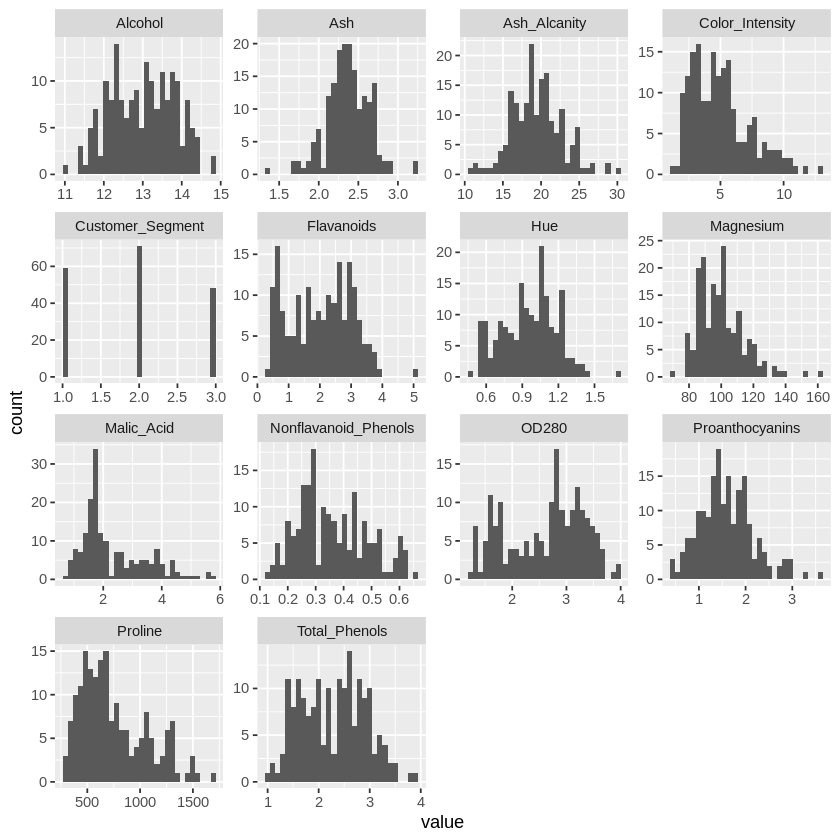

In [ ]:
data %>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) + 
  facet_wrap(~ key, scales = "free") + geom_histogram(bins = 30)

Another viewpoint to take while analyzing the data is determining the number of customers based on our three segments. Based on our analysis, these values are close from a numerical perspective. For the first segment, we have a total of **59** rows. The following customer, referred to as number **2**, is the high proportion of our dataset with **79** rows. Last but not least, the final segment is totaled to a total number of **48** rows. The ratio of customer segments is evenly matched without any of the segments being exceptionally high compared to the others. 

The code that performs this task in R is as follows:

In [ ]:
data %>%
  group_by(Customer_Segment) %>%
  summarise(count = n())

Customer_Segment,count
<dbl>,<int>
1,59
2,71
3,48


## Implementing a K-means Clustering in R

This article will employ a k-means cluster. To explain, this unsupervised machine learning model creates groups of attributes based on similarities in a dataset. To simplify, our model will create wine groups based on acidity, flavor, and other chemical alcohol features. 

To run a K-means model using R programming, we will have first to normalize our data frame using the `scale` method as follows:

In [ ]:
df_normalize <- as.data.frame(scale(data))

# Build the K-means Clustering

The K-means Clustering model will output the different wine groups based on their chemical similarities in our R program. Our code will first initialize the K-means Cluster object. The K-means Clustering algorithm will then be set up using the standard parameters.

In [ ]:
km.res <- kmeans(df_normalize, 3, nstart = 25)

# Conclusion & Results

The final section of our article is the understanding of our results. To easily digest how well our K-means Cluster successfully outputted the wine groups based on their chemical analysis. The main number we shall focus on in this section is the number of clusters. Which represents the total number of wine groups discovered using our K means algorithm. Our K-means Cluster outputted three groups. To explain, this is considered a great result as we can identify the edges of each group and their dimensions from the graph. For future development, our model will fully use the **GridDB** database as it provides an easy input-output data interface and an incredible speed of data retrieval.

The following cluster plot is a representation of our results:

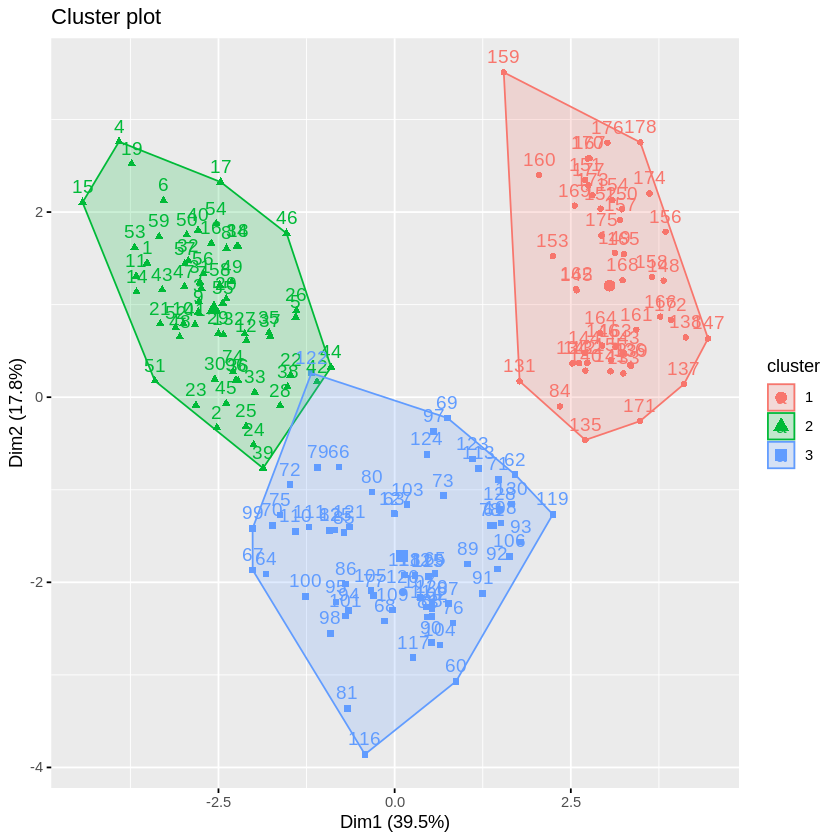

In [ ]:
fviz_cluster(km.res, data = df_normalize, ellipse.type = "convex")